# Capstone-project -How To Determine the best Bank branch location by Demographics

# Data analysis & Foursquare API(Toronto neighbourhood Case study.

# Read Data files

In [235]:
# The code was removed by Watson Studio for sharing.

,HoodID,Neighbourhood
0,1,West Humber-Clairville
1,2,Mount Olive-Silverstone-Jamestown
2,3,Thistletown-Beaumond Heights
3,4,Rexdale-Kipling
4,5,Elms-Old Rexdale


In [236]:
df1=pd.read_csv('https://cocl.us/Geospatial_data')
df1.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [237]:
df2=pd.merge(df, df1, left_index=True, right_index=True)
df2.drop(['Postal Code'], axis=1, inplace=True)
df2.head(10)

,HoodID,Neighbourhood,Latitude,Longitude
0,1,West Humber-Clairville,43.806686,-79.194353
1,2,Mount Olive-Silverstone-Jamestown,43.784535,-79.160497
2,3,Thistletown-Beaumond Heights,43.763573,-79.188711
3,4,Rexdale-Kipling,43.770992,-79.216917
4,5,Elms-Old Rexdale,43.773136,-79.239476
5,6,Kingsview Village-The Westway,43.744734,-79.239476
6,7,Willowridge-Martingrove-Richview,43.727929,-79.262029
7,8,Humber Heights-Westmount,43.711112,-79.284577
8,9,Edenbridge-Humber Valley,43.716316,-79.239476
9,10,Princess-Rosethorn,43.692657,-79.264848


In [238]:
df2.shape

(103, 4)

In [239]:
# The code was removed by Watson Studio for sharing.

,Hood,Neighbourhood,Pop2016,employed,unemployed,Not in the labour force,uneducated,college,educated,households,Owner,Renter,households spending%,income level,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,55 years and over,60 to 64 years
0,1,West Humber-Clairville,33312,17610,1750,9755,6170,4375,1445,10130,7075,3050,27.9,59703,3120,2785,2345,2035,1980,2475,2195,8970,1795
1,2,Mount Olive-Silverstone-Jamestown,32954,14655,2175,10320,6855,3325,1090,9610,4540,5070,33.3,46986,2655,2400,2250,2185,2275,2190,1955,7040,1520
2,3,Thistletown-Beaumond Heights,10360,4825,530,3315,1970,1180,650,3225,2080,1145,25.1,57522,760,680,715,665,610,770,660,3065,535
3,4,Rexdale-Kipling,10529,5270,590,3330,2095,1450,350,3945,2010,1935,19.7,51194,720,715,680,640,680,815,870,3255,650
4,5,Elms-Old Rexdale,9456,4640,575,2850,2025,1395,260,3225,1910,1315,34.3,49425,750,600,575,550,540,755,730,2535,525


In [240]:
df3.shape

(140, 23)

In [241]:
df3.dtypes

Hood                         int64
Neighbourhood               object
Pop2016                      int64
employed                     int64
unemployed                   int64
Not in the labour force      int64
uneducated                   int64
 college                     int64
educated                     int64
households                   int64
  Owner                      int64
  Renter                     int64
  households spending%     float64
income level                 int64
20 to 24 years               int64
25 to 29 years               int64
30 to 34 years               int64
35 to 39 years               int64
40 to 44 years               int64
50 to 54 years               int64
55 to 59 years               int64
55 years and over            int64
60 to 64 years               int64
dtype: object

# aggregate prospected clients columns in one column


In [242]:
df3['Total_prospected_clients']=df3['20 to 24 years']+df3['25 to 29 years']+df3['30 to 34 years']+df3['35 to 39 years']+df3['40 to 44 years']+df3['50 to 54 years']+df3['55 to 59 years']+df3['55 years and over']+df3['60 to 64 years']

# Data analysis

# invistigate the relation & correlation between variables

(0, 65627.71345601942)

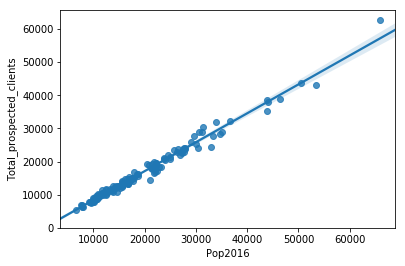

In [243]:
import seaborn as sns
sns.regplot(x="Pop2016", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

In [244]:
df3[['Pop2016','Total_prospected_clients']].corr()

,Pop2016,Total_prospected_clients
Pop2016,1.00000,0.99139
Total_prospected_clients,0.99139,1.00000


(0, 65629.23074082524)

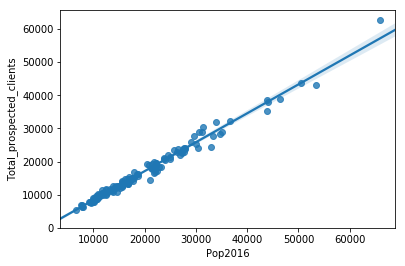

In [245]:
sns.regplot(x="Pop2016", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

(0, 65655.33437530363)

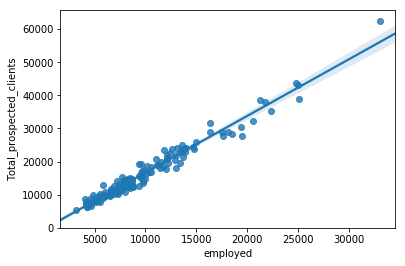

In [246]:
sns.regplot(x="employed", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

In [247]:
df3[['employed','Total_prospected_clients']].corr()

,employed,Total_prospected_clients
employed,1.00000,0.98181
Total_prospected_clients,0.98181,1.00000


(0, 69113.2695363077)

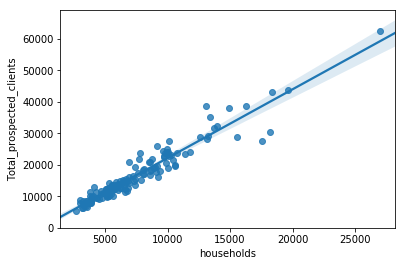

In [248]:
sns.regplot(x="households", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

In [249]:
df3[['households','Total_prospected_clients']].corr()

,households,Total_prospected_clients
households,1.00000,0.95787
Total_prospected_clients,0.95787,1.00000


(0, 65569.82963708704)

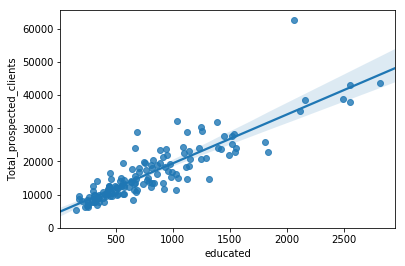

In [250]:
sns.regplot(x="educated", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

In [251]:
df3[['educated','Total_prospected_clients']].corr()

,educated,Total_prospected_clients
educated,1.000000,0.876948
Total_prospected_clients,0.876948,1.000000


(0, 65590.05644671539)

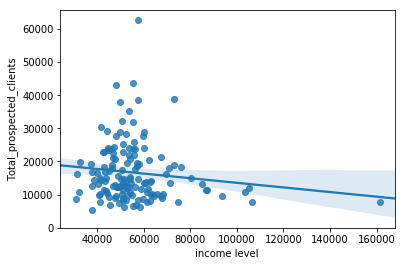

In [252]:
sns.regplot(x="income level ", y="Total_prospected_clients", data=df3)
plt.ylim(0,)

In [253]:
df3[['income level ','Total_prospected_clients']].corr()

,income level,Total_prospected_clients
income level,1.000000,-0.126957
Total_prospected_clients,-0.126957,1.000000


In [254]:
# calling the only nedeed variables
df3=df3[['Neighbourhood','Pop2016','households','educated','employed','Total_prospected_clients']]
df3.head()

,Neighbourhood,Pop2016,households,educated,employed,Total_prospected_clients
0,West Humber-Clairville,33312,10130,1445,17610,27700
1,Mount Olive-Silverstone-Jamestown,32954,9610,1090,14655,24470
2,Thistletown-Beaumond Heights,10360,3225,650,4825,8460
3,Rexdale-Kipling,10529,3945,350,5270,9025
4,Elms-Old Rexdale,9456,3225,260,4640,7560


In [255]:
df3.describe()

,Pop2016,households,educated,employed,Total_prospected_clients
count,140.000000,140.000000,140.00000,140.000000,140.000000
mean,19511.221429,7484.821429,812.00000,9999.928571,16668.857143
std,10033.589222,3870.676721,525.48395,5066.518677,8831.766005
min,6577.000000,2665.000000,150.00000,3150.000000,5445.000000
25%,12019.500000,5021.250000,443.75000,6597.500000,10507.500000
50%,16749.500000,6547.500000,675.00000,8602.500000,14175.000000
75%,23854.500000,9188.750000,1028.75000,12140.000000,20847.500000
max,65913.000000,26990.000000,2815.00000,33045.000000,62585.000000


# boxplot to show the distrubtion of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3122d5898>,
      dtype=object)

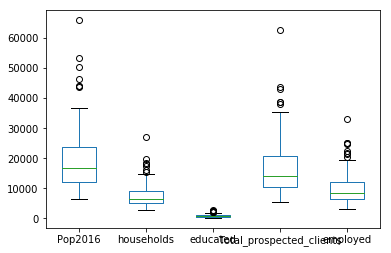

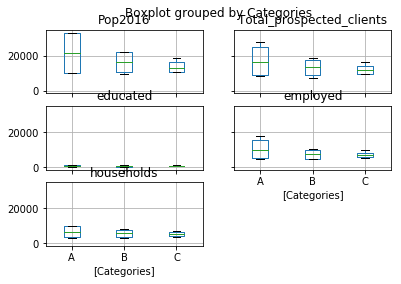

In [256]:
import pandas as pd, numpy as np
df3.boxplot(column=['Pop2016','households','educated','Total_prospected_clients','employed'], grid=False)
df3['Categories'] = pd.Series(list('AAAABBBBCCCC'))

df3.boxplot(by='Categories')

# Heat Map

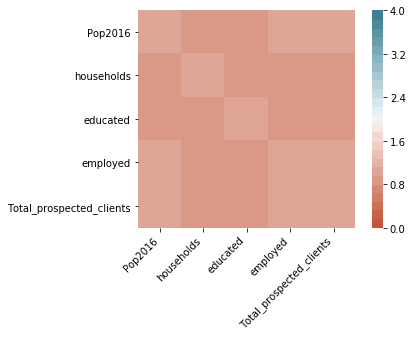

In [260]:
import seaborn as sns
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=4, center=2,
    cmap=sns.diverging_palette(20, 220, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Sort values ascending to show the best first two regions nominated for our bank branch location analysis to determine which one will be elected
# the highest expexected prospected clients will be nominated 

In [152]:
df3.sort_values(['Pop2016','households','educated','Total_prospected_clients','employed'], ascending=False, inplace=True)
df3.head()


,Neighbourhood,Pop2016,households,educated,employed,Total_prospected_clients,Categories
76,Waterfront Communities-The Island,65913,26990,2060,33045,62585,NaN
136,Woburn,53485,18380,2555,24980,43190,NaN
50,Willowdale East,50434,19635,2815,24755,43710,NaN
130,Rouge,46496,13060,2495,25100,38820,NaN
116,L'Amoreaux,43993,14915,2550,21770,38010,NaN


# Regression analysis

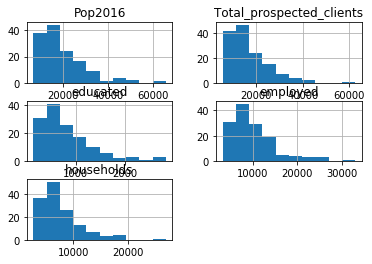

In [153]:
viz =df3[['Pop2016','households','employed','educated','Total_prospected_clients']]
viz.hist()
plt.show()


In [154]:
df4=df3[['Pop2016','households','educated','employed','Total_prospected_clients']]

# Regression analysis result report 

In [155]:

!pip install statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
x = np.linspace(-5, 5, 132)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
df4 = pd.DataFrame({'x': x, 'y': y})
model = ols("y ~ x", df4).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     784.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           6.27e-57
Time:                        11:11:32   Log-Likelihood:                -357.50
No. Observations:                 132   AIC:                             719.0
Df Residuals:                     130   BIC:                             724.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7889      0.318    -15.039      0.0

# Model Validity analysis

# F value , Pvalue for our model
# ANOVA table 

In [156]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df3['Pop2016'], df3['households'], df3['Total_prospected_clients'], df3['employed'],df3['educated'])
print(fvalue, pvalue)


# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
df3_melt = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['Pop2016', 'Total_prospected_clients', 'households', 'employed','educated'])
# replace column names
df3_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df3_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


176.65211006227304 2.4150093099618712e-104


,sum_sq,df,F,PR(>F)
C(treatments),3.103437e+10,4.0,176.65211,2.415009e-104
Residual,3.052452e+10,695.0,NaN,NaN


In [157]:
#The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore,
#we conclude that there are significant differences among treatments.

#From ANOVA analysis, we know that treatment differences are statistically significant, 
#but ANOVA does not tell which treatments are significantly different from each other.

# Perform multiple pairwise comparison (Tukey HSD)

In [158]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df3_melt['value'], groups=df3_melt['treatments'], alpha=0.05)
print(m_comp)


                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                     
         group1                   group2            meandiff     lower       upper    reject
--------------------------------------------------------------------------------------------
        Pop2016          Total_prospected_clients  -2842.3643  -5008.7412  -675.9873   True 
        Pop2016                  educated         -18699.2214 -20865.5984 -16532.8445  True 
        Pop2016                  employed          -9511.2929 -11677.6698  -7344.9159  True 
        Pop2016                 households          -12026.4   -14192.777  -9860.023   True 
Total_prospected_clients         educated         -15856.8571 -18023.2341 -13690.4802  True 
Total_prospected_clients         employed          -6668.9286  -8835.3055  -4502.5516  True 
Total_prospected_clients        households         -9184.0357 -11350.4127  -7017.6588  True 
        educated                 employed          9187.9286   7021.55

In [159]:
#Above results from Tukey HSD suggests that , all other pairwise
#comparisons for treatments rejects null hypothesis and  indicates statistical significant differences.

In [160]:
#Test ANOVA assumptions

#The Shapiro-Wilk test can be used to check the normal distribution of residuals
#Null hypothesis: data is drawn from normal distribution.

# Shapiro Test

In [161]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8370620608329773 3.8633563038729035e-26


In [36]:
#As the P-value is  significant, we succeded to reject null hypothesis and conclude that 
#data is drawn from normal distribution.

#As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. 
#Null hypothesis: samples from populations have equal variances.

# Bartlett Test

In [37]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df3['Pop2016'], df3['Total_prospected_clients'], df3['employed'], df3['households'],df3['educated'])
print(w, pvalue)

731.5350704365225 5.170930278460449e-157


In [38]:
#As the P-value  significant, we succeded to reject null hypothesis and conclude that treatments have not equal
#variances.

# Categorized Data by Binning :to prepare it for classification 

In [39]:
bins = np.linspace(min(df3["Pop2016"]), max(df3["Pop2016"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['Pop2016-binned'] = pd.cut(df3['Pop2016'], bins, labels=group_names, include_lowest=True)
df3["Pop2016-binned"].value_counts()

Low       111
Medium     25
High        4
Name: Pop2016-binned, dtype: int64

In [40]:
bins = np.linspace(min(df3["households"]), max(df3["households"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['households-binned'] = pd.cut(df3['households'], bins, labels=group_names, include_lowest=True)
df3["households-binned"].value_counts()

Low       123
Medium     15
High        2
Name: households-binned, dtype: int64

In [41]:
bins = np.linspace(min(df3["employed"]), max(df3["employed"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['employed-binned'] = pd.cut(df3['employed'], bins, labels=group_names, include_lowest=True)
df3["employed-binned"].value_counts()

Low       112
Medium     24
High        4
Name: employed-binned, dtype: int64

In [42]:
bins = np.linspace(min(df3["educated"]), max(df3["educated"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['educated-binned'] = pd.cut(df3['educated'], bins, labels=group_names, include_lowest=True)
df3["educated-binned"].value_counts()

Low       105
Medium     28
High        7
Name: educated-binned, dtype: int64

In [46]:
import numpy as np
bins = np.linspace(min(df3["Total_prospected_clients"]), max(df3["Total_prospected_clients"]), 4)
group_names = ['Low', 'Medium', 'High']
df3['Total_prospected_clients-binned'] = pd.cut(df3['Total_prospected_clients'], bins, labels=group_names, include_lowest=True)
df3["Total_prospected_clients-binned"].value_counts()

Low       122
Medium     16
High        2
Name: Total_prospected_clients-binned, dtype: int64

In [47]:
df3.replace('High',int(3),inplace=True)
df3.replace('Medium',int(2),inplace=True)
df3.replace('Low', int(1),inplace=True)
df3.head()

,Neighbourhood,Pop2016,households,educated,employed,Total_prospected_clients,Categories,Pop2016-binned,households-binned,employed-binned,educated-binned,Total_prospected_clients-binned
76,Waterfront Communities-The Island,65913,26990,2060,33045,62585,NaN,3,3,3,3,3
136,Woburn,53485,18380,2555,24980,43190,NaN,3,2,3,3,2
50,Willowdale East,50434,19635,2815,24755,43710,NaN,3,3,3,3,3
130,Rouge,46496,13060,2495,25100,38820,NaN,3,2,3,3,2
116,L'Amoreaux,43993,14915,2550,21770,38010,NaN,2,2,2,3,2


In [176]:
df5=pd.merge(df2,df3, on='Neighbourhood')
df5.head()

,HoodID,Neighbourhood,Latitude,Longitude,Pop2016,households,educated,employed,Total_prospected_clients,Categories
0,1,West Humber-Clairville,43.806686,-79.194353,33312,10130,1445,17610,27700,A
1,2,Mount Olive-Silverstone-Jamestown,43.784535,-79.160497,32954,9610,1090,14655,24470,A
2,3,Thistletown-Beaumond Heights,43.763573,-79.188711,10360,3225,650,4825,8460,A
3,4,Rexdale-Kipling,43.770992,-79.216917,10529,3945,350,5270,9025,A
4,5,Elms-Old Rexdale,43.773136,-79.239476,9456,3225,260,4640,7560,B


In [ ]:
df5.sort_values(['Pop2016','households','educated','Total_prospected_clients','employed'], ascending=False, inplace=True)
df5.head()

# Classification Models

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# determine independent  varaiables , dependent variable, fit & split Data 

In [49]:
X=df3[['Pop2016-binned','households-binned','educated-binned','employed-binned']]

In [50]:
y=df3['Total_prospected_clients-binned'].values

In [51]:
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:' , X_test.shape, y_test.shape)

train set: (98, 4) (98,)
test set: (42, 4) (42,)


# k-means model kNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
K=9
kNN_model=KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
kNN_model
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [64]:
# best k
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
Ks=9
mean_acc=np.zeros((Ks-1))
confusionMx=[]
for n in range (1, Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]= metrics.jaccard_similarity_score(y_test, yhat)
mean_acc
print('the best accuarrcy was ', mean_acc.max(), "with K=" , mean_acc.argmax()+1)
    

the best accuarrcy was  0.9523809523809523 with K= 4


In [65]:
Ks=9
mean_acc=np.zeros((Ks-1))
confusionMx=[]
for n in range (1, Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X, y)
    yhatKNN=neigh.predict(X_test)
    mean_acc[n-1]= metrics.f1_score(y_test, yhatKNN, average='weighted')
mean_acc
print('the best accuarrcy was for kNN by f1_score= ', mean_acc.max(), "with K=" , mean_acc.argmax()+1)

the best accuarrcy was for kNN by f1_score=  0.9755745084103294 with K= 2


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

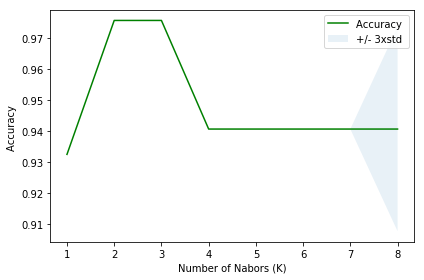

In [66]:
# DETERMINE THE BEST K with highest accuarcy 
std_acc = np.zeros((Ks-1))
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


# Decision tree model

In [68]:
# Decision Tree
# build and fit Decision tree model
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy' , max_depth=4)
tree.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
predTree=tree.predict(X_test)

print("Decision tree acurracy:", jaccard_similarity_score(y_test,predTree))

Decision tree acurracy: 0.9761904761904762


In [69]:
tree.fit(X, y)
yhattree=tree.predict(X_test)
print('Decision tree accuarcy by f1_score=', f1_score(y_test, yhattree, average='weighted'))

Decision tree accuarcy by f1_score= 0.9755745084103294


# Support Vector Machine

In [70]:

# build and fit svm model
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
yhat=clf.predict(X_test)
print("SVM accuarcy:" , jaccard_similarity_score(y_test ,yhat))

SVM accuarcy: 0.9761904761904762


In [72]:
clf.fit(X, y)
yhatSVM=clf.predict(X_test)
print('SVM accuarcy by f1_score=', f1_score(y_test, yhatSVM, average='weighted'))

SVM accuarcy by f1_score= 0.9755745084103294


# Logistic Regression


In [74]:
# Building logisticRegression model
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
# predict & print classification report for accuarcy
yhat =LR_model.predict(X_test)
yhat_proba=LR_model.predict_proba(X_test)
print('LR_model accuarcy by jaccard=', jaccard_similarity_score(y_test, yhat))

LR_model accuarcy by jaccard= 0.9047619047619048


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [136]:

from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      0.83      0.90        23
           3       0.44      1.00      0.62         4
           4       0.00      0.00      0.00         1

   micro avg       0.82      0.82      0.82        28
   macro avg       0.48      0.61      0.51        28
weighted avg       0.88      0.82      0.83        28



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:


print ('LR_model accuarcy by f1_score=', f1_score(y_test, yhat, average='weighted'))

LR_model accuarcy by f1_score= 0.8311093668236523


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
yhatLR_proba=LR_model.predict_proba(X_test)
print('LR_model accuarcy by log_loss=', log_loss(y_test, yhatLR_proba))

LR_model accuarcy by log_loss= 0.8570612899440603


# Summary of result to chosse the best classifer with high accuarcy refer to report to know the best classifier for our model 

|  Algorithm         | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN  k=3           | 0.952   |0.976     | NA      |
| Decision Tree      | 0.976   |0.975     | NA      |
| SVM                | 0.976   |0.975     | NA      |
| LogisticRegression | 0.905   |0.830     | 0.858   |

# The best Location Analysis By Foursqure API 
#  from Data Analysis the best nominations for our branch location on toronto
# neighbourhood depending on the best expected prospected clients in the market are:-   

# 1-Waterfront Communities-The Island .  
# 2-Willowdale East 
 

In [76]:
!pip install xlrd
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('liberiers imported' )



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [102]:
import pandas as pd
import numpy as np
import plotly.offline as plt
import plotly.graph_objs as go
from sklearn.cluster import KMeans


In [179]:
search_query = 'Toronto Neighbourhood'
radius = 500
print(search_query + ' .... OK!')

Toronto Neighbourhood .... OK!


In [180]:
CLIENT_ID = '53MGRCPZWRM4KO4VYB1ZEEDQDM1MCKVSGFBQ0YQ3PAVV35OF' # your Foursquare ID
CLIENT_SECRET = 'HDHDY12D2GCVY3M34DK200KFMSILX22ZFWIGFMIRTD5HGU1C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 53MGRCPZWRM4KO4VYB1ZEEDQDM1MCKVSGFBQ0YQ3PAVV35OF
CLIENT_SECRET:HDHDY12D2GCVY3M34DK200KFMSILX22ZFWIGFMIRTD5HGU1C


In [195]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [202]:
df5.head()

,HoodID,Neighbourhood,Latitude,Longitude,Pop2016,households,educated,employed,Total_prospected_clients,Categories
76,77,Waterfront Communities-The Island,43.669005,-79.442259,65913,26990,2060,33045,62585,NaN
50,51,Willowdale East,43.679563,-79.377529,50434,19635,2815,24755,43710,NaN
13,14,Islington-City Centre West,43.781638,-79.304302,43965,16250,2155,21295,38635,NaN
92,93,Dovercourt-Wallace Emerson-Junction,43.628841,-79.520999,36625,13945,1040,20530,32285,NaN
25,26,Downsview-Roding-CFB,43.753259,-79.329656,35052,13265,1260,17550,29065,NaN


# waterfront Communities-The Island location analysis

In [203]:
toronto_neighbourhood_data=df2[df2['Neighbourhood']=='Waterfront Communities-The Island']

In [204]:
latitude=43.669005
longitude=-79.442259

In [205]:
toronto_neighbourhood_venues = getNearbyVenues(names=toronto_neighbourhood_data['Neighbourhood'],
                                   latitudes=toronto_neighbourhood_data['Latitude'],
                                   longitudes=toronto_neighbourhood_data['Longitude'], radius=500, LIMIT=100)

Waterfront Communities-The Island


In [206]:
toronto_neighbourhood_venues.groupby('Neighbourhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Waterfront Communities-The Island,19,19,19,19,19,19


In [207]:
print(toronto_neighbourhood_venues.shape)
toronto_neighbourhood_venues.head()

(19, 7)


,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Waterfront Communities-The Island,43.669005,-79.442259,The Greater Good Bar,43.669409,-79.439267,Bar
1,Waterfront Communities-The Island,43.669005,-79.442259,Parallel,43.669516,-79.438728,Middle Eastern Restaurant
2,Waterfront Communities-The Island,43.669005,-79.442259,Planet Fitness,43.667588,-79.442574,Gym / Fitness Center
3,Waterfront Communities-The Island,43.669005,-79.442259,Blood Brothers Brewing,43.669944,-79.436533,Brewery
4,Waterfront Communities-The Island,43.669005,-79.442259,FreshCo,43.667918,-79.440754,Grocery Store


In [208]:
toronto_neighbourhood_onehot = pd.get_dummies(toronto_neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_neighbourhood_onehot['Neighbourhood'] = toronto_neighbourhood_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_neighbourhood_onehot.columns[-1]] + list(toronto_neighbourhood_onehot.columns[:-1])
toronto_neighbourhood_onehot = toronto_neighbourhood_onehot[fixed_columns]

toronto_neighbourhood_onehot.head()

,Neighbourhood,Bakery,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Middle Eastern Restaurant,Music Venue,Park,Pharmacy,Pizza Place,Pool,Supermarket
0,Waterfront Communities-The Island,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Waterfront Communities-The Island,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [209]:
toronto_neighbourhood_onehot = pd.get_dummies(toronto_neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_neighbourhood_onehot['Neighbourhood'] = toronto_neighbourhood_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_neighbourhood_onehot.columns[-1]] + list(toronto_neighbourhood_onehot.columns[:-1])
toronto_neighbourhood_onehot = toronto_neighbourhood_onehot[fixed_columns]

toronto_neighbourhood_onehot.head()

,Neighbourhood,Bakery,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Middle Eastern Restaurant,Music Venue,Park,Pharmacy,Pizza Place,Pool,Supermarket
0,Waterfront Communities-The Island,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Waterfront Communities-The Island,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Waterfront Communities-The Island,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [210]:
toronto_neighbourhood_grouped = toronto_neighbourhood_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_neighbourhood_grouped

,Neighbourhood,Bakery,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Middle Eastern Restaurant,Music Venue,Park,Pharmacy,Pizza Place,Pool,Supermarket
0,Waterfront Communities-The Island,0.105263,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.052632,0.105263,0.052632,0.052632,0.052632


In [211]:
num_top_venues = 10

for hood in toronto_neighbourhood_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_neighbourhood_grouped[toronto_neighbourhood_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Waterfront Communities-The Island----
                       venue  freq
0                     Bakery  0.11
1                   Pharmacy  0.11
2       Gym / Fitness Center  0.05
3                       Pool  0.05
4                Pizza Place  0.05
5                       Park  0.05
6                Music Venue  0.05
7  Middle Eastern Restaurant  0.05
8              Grocery Store  0.05
9                       Bank  0.05




In [212]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [213]:
num_top_venues =10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_neighbourhood_grouped['Neighbourhood']

for ind in np.arange(toronto_neighbourhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_neighbourhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Waterfront Communities-The Island,Bakery,Pharmacy,Furniture / Home Store,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Supermarket


In [214]:
# set number of clusters
kclusters =1

toronto_neighbourhood_grouped_clustering =toronto_neighbourhood_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_neighbourhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0], dtype=int32)

In [215]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_neighbourhood_merged = toronto_neighbourhood_data


toronto_neighbourhood_merged = toronto_neighbourhood_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_neighbourhood_merged.head() # check the last columns!

,HoodID,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,77,Waterfront Communities-The Island,43.669005,-79.442259,0,Bakery,Pharmacy,Furniture / Home Store,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Supermarket


In [216]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_neighbourhood_merged['Latitude'], toronto_neighbourhood_merged['Longitude'], toronto_neighbourhood_merged['Neighbourhood'], toronto_neighbourhood_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [217]:
toronto_neighbourhood_merged.loc[toronto_neighbourhood_merged['Cluster Labels'] == 0, toronto_neighbourhood_merged.columns[[1] + list(range(5, toronto_neighbourhood_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,Waterfront Communities-The Island,Bakery,Pharmacy,Furniture / Home Store,Bank,Bar,Brazilian Restaurant,Brewery,Café,Fast Food Restaurant,Supermarket


# Willowdale East Location analysis 

In [218]:

address = 'Willowdale East, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Woburn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Woburn are 43.7615095, -79.4109234.


In [219]:
toronto_neighbourhood_data=df2[df2['Neighbourhood']=='Willowdale East'].reset_index(drop=True)
toronto_neighbourhood_data.head(10)

,HoodID,Neighbourhood,Latitude,Longitude
0,51,Willowdale East,43.679563,-79.377529


In [264]:
import requests # library to handle requests
from pandas.io.json import json_normalize 

In [265]:
toronto_neighbourhood_venues = getNearbyVenues(names=toronto_neighbourhood_data['Neighbourhood'],
                                   latitudes=toronto_neighbourhood_data['Latitude'],
                                   longitudes=toronto_neighbourhood_data['Longitude'], radius=500, LIMIT=100)

Willowdale East


In [266]:
toronto_neighbourhood_venues.groupby('Neighbourhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Willowdale East,4,4,4,4,4,4


In [267]:
print(toronto_neighbourhood_venues.shape)
toronto_neighbourhood_venues.head()

(4, 7)


,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Willowdale East,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Willowdale East,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Willowdale East,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Willowdale East,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail


In [268]:
toronto_neighbourhood_onehot = pd.get_dummies(toronto_neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_neighbourhood_onehot['Neighbourhood'] = toronto_neighbourhood_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_neighbourhood_onehot.columns[-1]] + list(toronto_neighbourhood_onehot.columns[:-1])
toronto_neighbourhood_onehot = toronto_neighbourhood_onehot[fixed_columns]

toronto_neighbourhood_onehot.head()

,Neighbourhood,Park,Playground,Trail
0,Willowdale East,0,1,0
1,Willowdale East,1,0,0
2,Willowdale East,1,0,0
3,Willowdale East,0,0,1


In [225]:
toronto_neighbourhood_onehot = pd.get_dummies(toronto_neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_neighbourhood_onehot['Neighbourhood'] = toronto_neighbourhood_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_neighbourhood_onehot.columns[-1]] + list(toronto_neighbourhood_onehot.columns[:-1])
toronto_neighbourhood_onehot = toronto_neighbourhood_onehot[fixed_columns]

toronto_neighbourhood_onehot.head()

,Neighbourhood,Park,Playground,Trail
0,Willowdale East,0,1,0
1,Willowdale East,1,0,0
2,Willowdale East,1,0,0
3,Willowdale East,0,0,1


In [226]:
toronto_neighbourhood_grouped = toronto_neighbourhood_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_neighbourhood_grouped

,Neighbourhood,Park,Playground,Trail
0,Willowdale East,0.5,0.25,0.25


In [227]:
num_top_venues = 10

for hood in toronto_neighbourhood_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_neighbourhood_grouped[toronto_neighbourhood_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Willowdale East----
        venue  freq
0        Park  0.50
1  Playground  0.25
2       Trail  0.25




In [228]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [229]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_neighbourhood_grouped['Neighbourhood']

for ind in np.arange(toronto_neighbourhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_neighbourhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Willowdale East,Park,Trail,Playground


In [230]:
# set number of clusters
kclusters =1

toronto_neighbourhood_grouped_clustering =toronto_neighbourhood_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_neighbourhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0], dtype=int32)

In [231]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_neighbourhood_merged = toronto_neighbourhood_data

#
toronto_neighbourhood_merged = toronto_neighbourhood_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_neighbourhood_merged.head() # check the last columns!

,HoodID,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,51,Willowdale East,43.679563,-79.377529,0,Park,Trail,Playground


In [232]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_neighbourhood_merged['Latitude'], toronto_neighbourhood_merged['Longitude'], toronto_neighbourhood_merged['Neighbourhood'], toronto_neighbourhood_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [233]:
toronto_neighbourhood_merged.loc[toronto_neighbourhood_merged['Cluster Labels'] == 0, toronto_neighbourhood_merged.columns[[1] + list(range(5, toronto_neighbourhood_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Willowdale East,Park,Trail,Playground


## From the clusters analysis for two locations and displaying maps the bestlocation for our bank branch will 
## be in waterfront communities-The Island Toronto Neighbourhood in center area where purchase pattern is
##  concentrated  in dupont street

# End of Capstone project 
# Thank You!